In [1]:
from sklearn.datasets import make_classification

In [2]:
x,y = make_classification(n_samples= 5000,
                          n_features= 40,
                          n_informative= 3,
                          n_redundant=2,
                          n_repeated= 0,
                          n_classes=2,
                          n_clusters_per_class=3,
                          weights=None,
                          flip_y=0.5,
                          class_sep=0.1,
                          hypercube=True,
                          shift=0.0,
                          scale = 1.0,
                          shuffle=True,
                          random_state=2
                        )

In [3]:
y.mean()

0.496

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_val, y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=24)

https://www.geeksforgeeks.org/how-to-install-xgboost-in-anaconda-python/
#to install xgboost

In [6]:
#pip install shap

In [7]:
#conda install -c conda-forge xgboost=1.3.0 shap=0.37.0

In [8]:
import xgboost as xgb

C:\Users\sid\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [9]:
xgb_model_1 = xgb.XGBClassifier(n_estimator = 10000,
                                verbosity = 1,
                                use_label_encoder = False,
                                objective='binary:logistic',
                                learning_rate = 0.3

)

In [10]:
%%time
xgb_model_1.fit(x_train,y_train, eval_metric='auc',verbose=True)

[20:38:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Wall time: 1.09 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=10000, n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

In [11]:
val_set_pred_prob = xgb_model_1.predict_proba(x_val)[:,1]
from sklearn.metrics import roc_auc_score

In [12]:
roc_auc_score(y_val, val_set_pred_prob)

0.602644

In [13]:
eval_set = [(x_train, y_train),(x_val, y_val)]

In [14]:
xgb_model_1.fit(x_train, y_train, eval_set=eval_set, eval_metric='auc',\
                verbose=True, early_stopping_rounds=50)

[20:38:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.72285	validation_1-auc:0.61351
[1]	validation_0-auc:0.75401	validation_1-auc:0.64212
[2]	validation_0-auc:0.78126	validation_1-auc:0.63925
[3]	validation_0-auc:0.80409	validation_1-auc:0.64090
[4]	validation_0-auc:0.81988	validation_1-auc:0.63914
[5]	validation_0-auc:0.83915	validation_1-auc:0.63326
[6]	validation_0-auc:0.86243	validation_1-auc:0.63256
[7]	validation_0-auc:0.87448	validation_1-auc:0.62999
[8]	validation_0-auc:0.88714	validation_1-auc:0.62600
[9]	validation_0-auc:0.89913	validation_1-auc:0.62096
[10]	validation_0-auc:0.90787	validation_1-auc:0.61844
[11]	validation_0-auc:0.91587	validation_1-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=10000, n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

In [15]:
xgb_model_1.get_booster().attributes()

{'best_iteration': '1', 'best_ntree_limit': '2', 'best_score': '0.642116'}

## Tuning the learning rate

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [17]:
learning_rates = np.linspace(0.01,1,25)

In [18]:
%%time
val_aucs =[]
best_iters = []
for learning_rate in learning_rates:
    xgb_model_1.set_params(**{'learning_rate':learning_rate})
    xgb_model_1.fit(x_train,y_train, eval_set=eval_set, eval_metric='auc',verbose=False,\
                   early_stopping_rounds=30)
    
    val_set_pred_proba_2 = xgb_model_1.predict_proba(x_val)[:,1]
    val_aucs.append(roc_auc_score(y_val,val_set_pred_proba_2))
    
    
    best_iters.append(int(xgb_model_1.get_booster().attributes()['best_iteration']))

[20:38:07] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:38:07] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:38:08] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

[20:38:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:38:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:38:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

[20:38:19] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:38:19] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Wall time: 13 s


In [19]:
learning_rate_df = pd.DataFrame({'learning_rate':learning_rates,
                                 'Validation auc':val_aucs, 
                                 'Best Iteration': best_iters})
learning_rate_df

,learning_rate,Validation auc,Best Iteration
0,0.01000,0.654260,46
1,0.05125,0.656872,29
2,0.09250,0.652460,22
3,0.13375,0.661944,7
4,0.17500,0.653510,5
5,0.21625,0.659246,4
6,0.25750,0.653960,6
7,0.29875,0.642156,1
8,0.34000,0.641960,8
9,0.38125,0.637034,2


In [20]:
learning_rate_df['Validation auc'].max()

0.661944

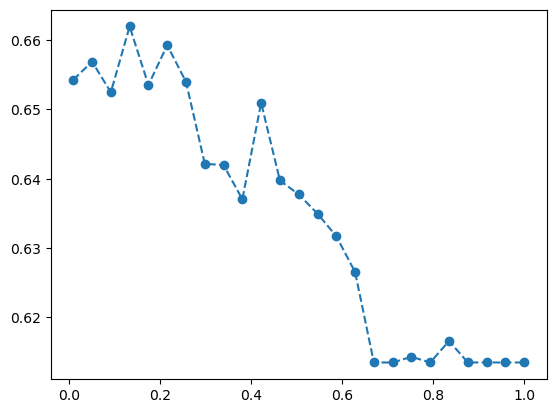

In [22]:
plt.plot(learning_rates,val_aucs, '--o')

#ax.Axes.secondary_yaxis(learning_rate, best_iters,'-x')

<AxesSubplot:xlabel='learning_rate'>

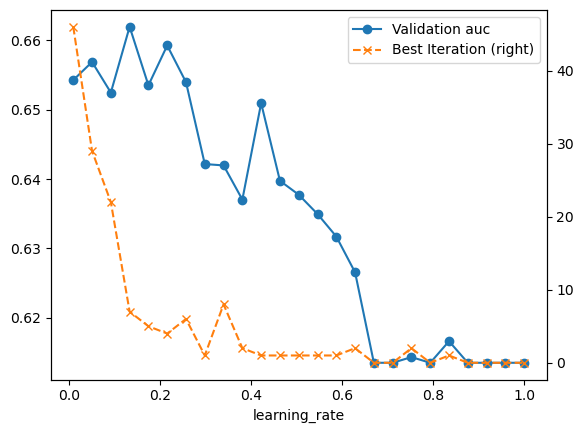

In [23]:
learning_rate_df.set_index('learning_rate').plot(secondary_y = 'Best Iteration', style =['-o','--x'])

In [24]:
max(val_aucs)

0.661944

In [25]:
a = np.linspace(1,56,34)
b = np.linspace(345,100,34)
c = np.linspace(1,35,34)

In [26]:
df_tr = pd.DataFrame({'a':a, 'b':b,'c':c})
#df_tr

<AxesSubplot:xlabel='c'>

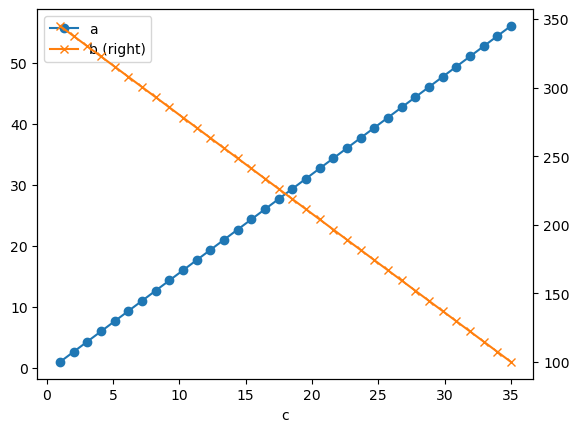

In [27]:
df_tr.set_index('c').plot(secondary_y = 'b', style = ['-o','-x'])

In [28]:
from scipy.stats import uniform

In [29]:
param_grid = {'max_depth':[2,3,4,5,6,7],
              'gamma':uniform(loc=0.0, scale =3),
              'min_child_weight':list(range(1,151)),
              'colsample_bytree':uniform(loc=0.1, scale =0.9),
              'subsample':uniform(loc = 0.5, scale = 0.5),
              'learning_rate':uniform(loc = 0.01, scale = 0.5)
             }

In [30]:
from sklearn.model_selection import ParameterSampler

In [31]:
rng = np.random.RandomState(0)
n_iter = 1000

param_list = list(ParameterSampler(param_grid,n_iter=n_iter, random_state=rng))

In [32]:
param_list[0]

{'colsample_bytree': 0.5939321535345923,
 'gamma': 2.1455680991172583,
 'learning_rate': 0.31138168803582195,
 'max_depth': 5,
 'min_child_weight': 104,
 'subsample': 0.7118273996694524}

In [33]:
xgb_model_2 = xgb.XGBClassifier(n_estimators = 1000,
                                verbosity = 1,
                                use_label_encoder= False,
                                objective='binary:logistic'
                                
                                )

In [34]:
xgb_model_2.set_params(**param_list[0])

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.5939321535345923,
              enable_categorical=False, gamma=2.1455680991172583, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.31138168803582195, max_delta_step=None,
              max_depth=5, min_child_weight=104, missing=nan,
              monotone_constraints=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=0.7118273996694524, tree_method=None,
              use_label_encoder=False, validate_parameters=None, verbosity=1)

In [35]:
%%time
val_aucs = []
counter = 1

for params in param_list:
    xgb_model_2.set_params(**params)
    
    xgb_model_2.fit(x_train,y_train, eval_set=eval_set, eval_metric='auc', verbose=False, early_stopping_rounds=30)
    
    val_set_pre_probab = xgb_model_2.predict_proba(x_val)[:,1]
    val_aucs.append(roc_auc_score(y_val, val_set_pre_probab))
    
    if counter % 50 == 0:
        print('Done with {counter} of {n_iteration}'.format(counter = counter, n_iteration = n_iter))
        
    counter += 1
    

Done with 50 of 1000
Done with 100 of 1000
Done with 150 of 1000
Done with 200 of 1000
Done with 250 of 1000
Done with 300 of 1000
Done with 350 of 1000
Done with 400 of 1000
Done with 450 of 1000
Done with 500 of 1000
Done with 550 of 1000
Done with 600 of 1000
Done with 650 of 1000
Done with 700 of 1000
Done with 750 of 1000
Done with 800 of 1000
Done with 850 of 1000
Done with 900 of 1000
Done with 950 of 1000
Done with 1000 of 1000
Wall time: 5min 34s


In [36]:
xgb_param_search_df = pd.DataFrame(param_list)
xgb_param_search_df['Validation ROC AUC'] = val_aucs

In [37]:
max_auc = xgb_param_search_df.loc[xgb_param_search_df['Validation ROC AUC'] == xgb_param_search_df['Validation ROC AUC'].max()]
max_auc

,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,subsample,Validation ROC AUC
700,0.671979,1.688278,0.235682,6,37,0.828142,0.669768


In [38]:
## 0.661 vs 0.669

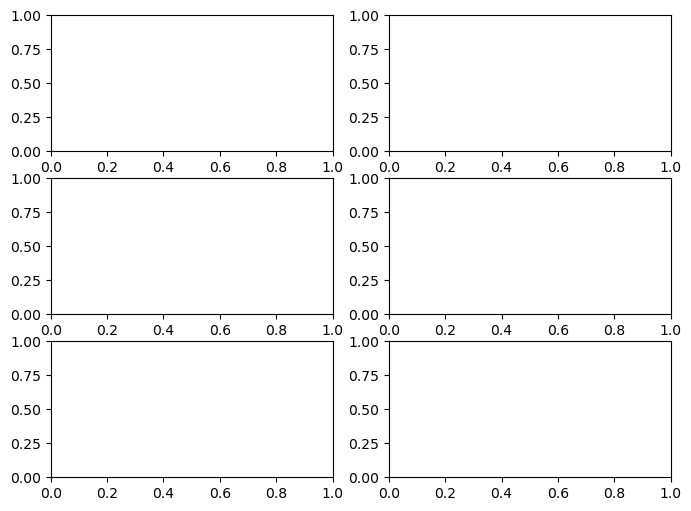

In [39]:
fig,axs = plt.subplots(3,2, figsize = (8,6))

In [40]:
axs.flatten()[1]

<AxesSubplot:>

 if col != 'max_depth':
        out,bins = pd.qcut(xgb_param_search_df[col], q = 10, retbins=True, duplicates='drop')
        
        for i in range(len(bins)-1):
            half_points.append((bins[i] + bins[i+1])/2)
        
    else:
        out = xgb_param_search_df[col]
        for i in range(len(bins)-1):
            half_points.append(np.sort(xgb_param_search_df[col].unique()))
        

IndexError: index 6 is out of bounds for axis 0 with size 6

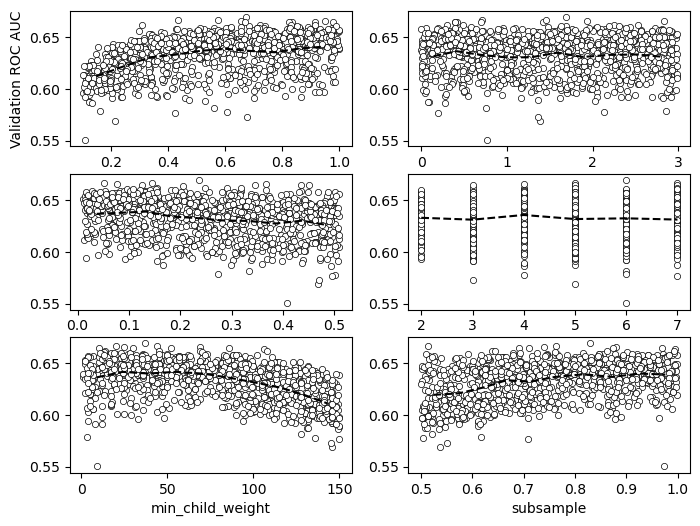

In [52]:
fig,axs = plt.subplots(3,2, figsize = (8,6))
counter  = 0
half_points = []
for col in xgb_param_search_df[:-1]:
    half_points = []
    this_ax = axs.flatten()[counter]
    
    xgb_param_search_df.plot.scatter(x = col, y = 'Validation ROC AUC', ax = this_ax, marker = 'o',\
                                    color = 'w',edgecolor = 'k', linewidth = 0.5
                                    )
    
    if counter > 0:
        this_ax.set_ylabel('')
        
    counter += 1
    
    if col != 'max_depth':
        out,bins = pd.qcut(xgb_param_search_df[col], q = 10, retbins=True, duplicates='drop')
        
        for i in range(len(bins)-1):
            half_points.append((bins[i] + bins[i+1])/2)
        
    else:
        out = xgb_param_search_df[col]     
        half_points = (np.sort(xgb_param_search_df[col].unique()))
   

    tmp_df = xgb_param_search_df.copy()
    tmp_df['param decile'] = out
    
    mean_df = tmp_df.groupby('param decile').agg({'Validation ROC AUC':'mean'})
    
    this_ax.plot(half_points,mean_df,color = 'k', linestyle = '--')
    
print(half_points)
plt.tight_layout

In [ ]:
 out,bins = pd.qcut(xgb_param_search_df[col], q = 10, retbins=True, duplicates='drop')

In [54]:
len(out)

1000

In [43]:
bins

array([0.5007345 , 0.54810864, 0.598942  , 0.64352098, 0.69001089,
       0.73420523, 0.78692043, 0.84661594, 0.89843079, 0.95217678,
       0.99926329])

In [46]:
for i in range(len(bins)-1):
            half_points = [(bins[i] + bins[i+1])/2]
        
        

In [47]:
 half_points = [(bins[ix] + bins[ix+1])/2
                       for ix in range(len(bins)-1)]

In [48]:
 half_points

[0.5244215723993041,
 0.5735253199044563,
 0.6212314882458307,
 0.6667659351685714,
 0.7121080596103817,
 0.7605628299220422,
 0.8167681852701247,
 0.8725233641694339,
 0.9253037836232065,
 0.97572003287584]

In [ ]:
len(half_points)

## pd.cut pandas

In [ ]:
a = range(5)

In [ ]:
out, bins = pd.qcut(a,4, retbins= True, labels= ['a','b','c','d'])
print(out)
print(bins)

In [ ]:
bins[0,]

In [ ]:
pd.DataFrame({ 'a': [0]})

In [79]:
tmp_df.groupby(['param decile'])['param decile'].count()


param decile
(0.5, 0.548]      100
(0.548, 0.599]    100
(0.599, 0.644]    100
(0.644, 0.69]     100
(0.69, 0.734]     100
(0.734, 0.787]    100
(0.787, 0.847]    100
(0.847, 0.898]    100
(0.898, 0.952]    100
(0.952, 0.999]    100
Name: param decile, dtype: int64

In [56]:
tmp_df['param decile'].unique()

[(0.69, 0.734], (0.5, 0.548], (0.734, 0.787], (0.952, 0.999], (0.787, 0.847], (0.644, 0.69], (0.898, 0.952], (0.599, 0.644], (0.847, 0.898], (0.548, 0.599]]
Categories (10, interval[float64, right]): [(0.5, 0.548] < (0.548, 0.599] < (0.599, 0.644] < (0.644, 0.69] ... (0.787, 0.847] < (0.847, 0.898] < (0.898, 0.952] < (0.952, 0.999]]

TypeError: 'int' object is not subscriptable

In [63]:
tmp_df['param decile'].values.tolist()

[Interval(0.69, 0.734, closed='right'),
 Interval(0.69, 0.734, closed='right'),
 Interval(0.5, 0.548, closed='right'),
 Interval(0.734, 0.787, closed='right'),
 Interval(0.734, 0.787, closed='right'),
 Interval(0.69, 0.734, closed='right'),
 Interval(0.952, 0.999, closed='right'),
 Interval(0.787, 0.847, closed='right'),
 Interval(0.644, 0.69, closed='right'),
 Interval(0.952, 0.999, closed='right'),
 Interval(0.644, 0.69, closed='right'),
 Interval(0.898, 0.952, closed='right'),
 Interval(0.734, 0.787, closed='right'),
 Interval(0.599, 0.644, closed='right'),
 Interval(0.69, 0.734, closed='right'),
 Interval(0.734, 0.787, closed='right'),
 Interval(0.787, 0.847, closed='right'),
 Interval(0.734, 0.787, closed='right'),
 Interval(0.847, 0.898, closed='right'),
 Interval(0.952, 0.999, closed='right'),
 Interval(0.898, 0.952, closed='right'),
 Interval(0.787, 0.847, closed='right'),
 Interval(0.69, 0.734, closed='right'),
 Interval(0.644, 0.69, closed='right'),
 Interval(0.644, 0.69, clo

In [62]:
type(tmp_df['param decile'].values)

pandas.core.arrays.categorical.Categorical

In [89]:
np.sort(tmp_df['max_depth'].unique())


array([2, 3, 4, 5, 6, 7], dtype=int64)

In [95]:
out, bins = pd.qcut(tmp_df['max_depth'],6, duplicates="drop", retbins= True)

In [98]:
out.unique()

[(4.0, 5.0], (1.999, 3.0], (6.0, 7.0], (5.0, 6.0], (3.0, 4.0]]
Categories (5, interval[float64, right]): [(1.999, 3.0] < (3.0, 4.0] < (4.0, 5.0] < (5.0, 6.0] < (6.0, 7.0]]

In [99]:
bins[0]

2.0

## End


In [107]:
xgb_mode_3 = xgb.XGBClassifier(n_estimator = 1000,
                               max_depth = 0,
                               learning_rate = 0.1,
                               verbosity = 1,
                               objective='binary:logistic',
                               use_label_encoder = False,
                               n_jobs = -1,
                               tree_method = 'hist',
                               grow_policy = 'lossguide'
                                )

In [108]:
max_leave_values = list(range(5,105,5))
max_leave_values

eval_set = [(x_train, y_train),(x_val, y_val)]

val_aucs = []

for max_leaves in max_leave_values:
    xgb_mode_3.set_params(**{'max_leaves':max_leaves})
    
    xgb_mode_3.fit(x_train,y_train, eval_set= [(x_train, y_train),(x_val, y_val)], eval_metric='auc', verbose=False, early_stopping_rounds=30)
    
    
    val_pred_prob = xgb_mode_3.predict_proba(x_val)[:,-1]
    val_aucs.append(roc_auc_score(y_val,val_pred_prob))

[08:33:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:33:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:33:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

[08:33:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:33:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:33:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

In [109]:
val_aucs

[0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999,
 0.6423639999999999]